## Assignment 2: Image filtering and segmentation
## Jisoo Park
### Due date: 2021-10-14
#### Prerequisite 
- Using `OpenCV`
- Kernal size should be odd

What we learnt:
- How to make a filter to remove noise from image
- how to segment the object of interest in the image
- conduct post processing the binary image using morphological operations

In [1]:
# import library
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
#Function to show one or multiple images
def show_images(images):
    cols = 2
    rows = len(images) // 2 + 1        
    figwidth = 20; figheight = rows * figwidth/(2*images[0][0].shape[1])*images[0][0].shape[0]
    
    plt.figure(figsize=(figwidth,figheight))
    for i, image in enumerate(images):
        plt.subplot(rows,cols,i+1)
        plt.imshow(image[0], cmap='gray')
        plt.title(str(image[1]))
        plt.xticks([]), plt.yticks([])
    plt.show()

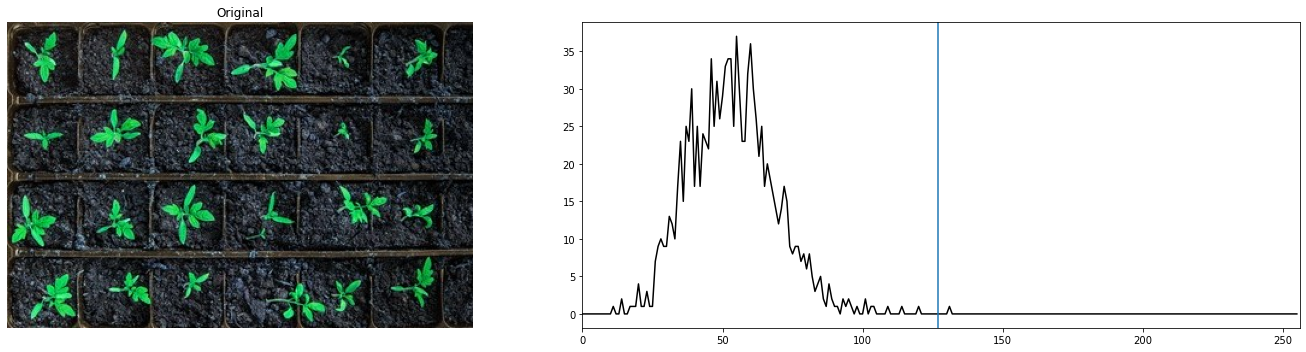

In [3]:
# Open the image
# cv2.imread returns image to the numeric value between 0 and 255
img_bgr = cv2.imread('test_image_1.jpg')

img_hist = cv2.calcHist(img_bgr, [0], None, [256], [0,256])

plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img_bgr)
plt.axis("off")

plt.subplot(1,2,2)
plt.plot(img_hist, color= 'black')
plt.xlim([0,256])
plt.axvline(x = 127)
plt.tight_layout()
plt.show()

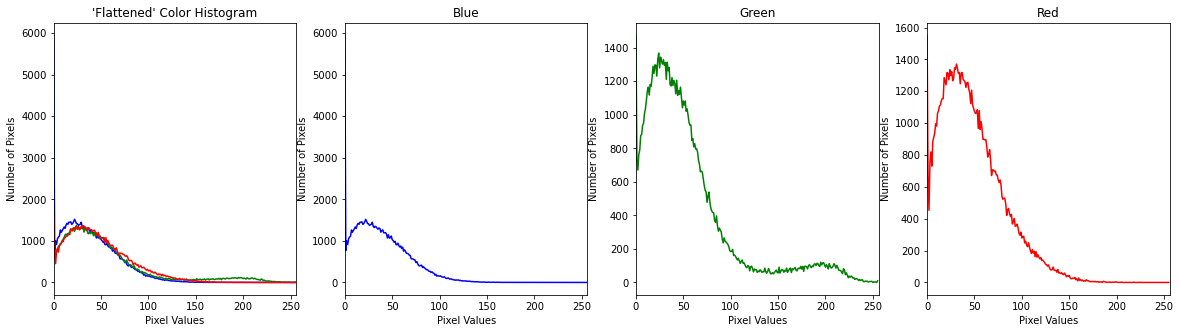

In [4]:
# calculate frequency of pixels in range 0-255
# Show the results
plt.figure(figsize=(20,5))

# split the image into its respective channels, then initialize the tuple of channel names along with our figure for plotting
chans = cv2.split(img_bgr)
colors = ("b", "g", "r")
plt.subplot(1,4,1)
plt.title("'Flattened' Color Histogram")
plt.xlabel("Pixel Values")
plt.ylabel("Number of Pixels")
# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.subplot(1,4,2)
plt.title("Blue")
plt.xlabel("Pixel Values")
plt.ylabel("Number of Pixels")
plt.xlim([0, 256])
plt.plot(cv2.calcHist([img_bgr], [0], None, [256], [0, 256]), 'b')

plt.subplot(1,4,3)
plt.title("Green")
plt.xlabel("Pixel Values")
plt.ylabel("Number of Pixels")
plt.xlim([0, 256])
plt.plot(cv2.calcHist([img_bgr], [1], None, [256], [0, 256]), 'g')

plt.subplot(1,4,4)
plt.title("Red")
plt.xlabel("Pixel Values")
plt.ylabel("Number of Pixels")
plt.xlim([0, 256])
plt.plot(cv2.calcHist([img_bgr], [2], None, [256], [0, 256]), 'r')

plt.show()

The first plot shows the original image and its histogram. We can see that the most values are located below the 127. The second plot describes the entire RGB(Red, Green, Blue) distribution and the separated RGB distribution. The flattened color histogram shows that the original image has a similar distribution despite separates into RGB channels. When we look at each RGB distribution, it has a different distribution between channels. However, the scale of the y-axis is varies depending on the color channel, so we need to be very careful when we analyze this graph. We can only see how it distributes in each of the color channels.

Basically, `OpenCV` receives the image into BGR(Blue, Green, Red), so we need to change it into RGB(Red, Green, Blue) channel manually. Here is the function that came from the practical course.

In [5]:
# Function to show an RGB image
def imshow_rgb(img):
    """Basically, cv2 returns the image into BGR(Blue, Green, Red) 
       so we need to change it into RGB(Red, Green, Blue)"""
    img_rgb = cv2.cvtColor(img, cv2. COLOR_BGR2RGB)
    plt.imshow(img_rgb)

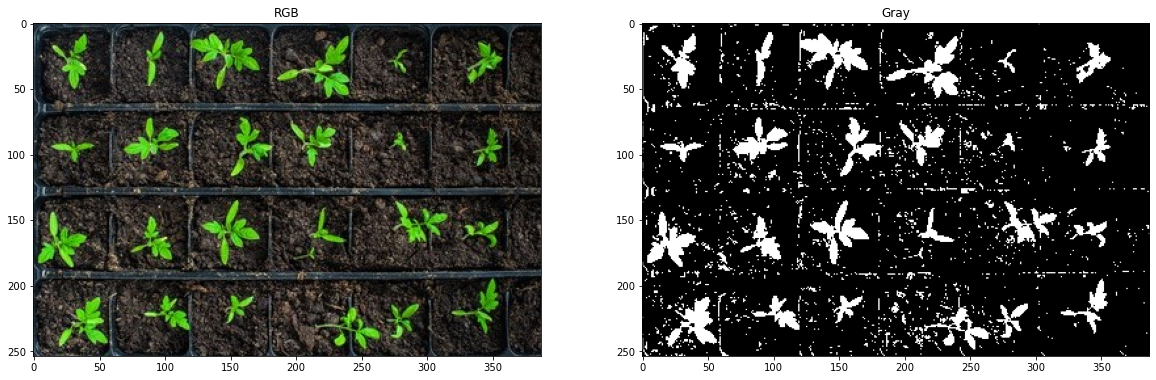

In [6]:
# Convert RGB colors to HSV colors
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
# Segment the seedlings based on the hue channel
seedling_mask = 255*(img_hsv[:,:,2] > 100).astype('uint8')
# print(seedling_mask)
# img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# plt.imshow(img_gray, cmap = 'gray')

# Show the results
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("RGB")
imshow_rgb(img_bgr)

plt.subplot(1,2,2)
plt.title("Gray")
plt.imshow(seedling_mask, cmap='gray')
# plt.imshow(img_gray)
plt.show()

According to wikipedia[1](https://en.wikipedia.org/wiki/Image_noise), `Image Noise` is an undesirable by-product of image capture that obscures the desired information. Here, we can define the image noise as small white blobs which indicate soil. In the grayscale image, we can see that the noise locates followed the planted line and were near the plants. Now we will apply the filters to the direct image to get rid of unnecessary information. It is known as a `pre-process`.

### Part 1. Noise pre-processing
#### Applying filters

- Average filter
- Gaussian filter
- Median filter


In image processing, a kernel is a matrix to use for filtering and more. The kernel size generally uses an odd number because to make it symmetric based on the anchor point. We can use a kernel to conduct a convolution in a very simplified way. The convolution is doing a very simplified calculation using a kernel. This means to sweep through the input sample, multiply each component with its corresponding filter kernel component, then sum the results, and put them in the corresponding output sample.[2](https://nmbu.instructure.com/courses/7475/files/1362683?module_item_id=147355) When we deal with the boundary of the image, we can apply padding to resizing the new image. [3](https://github.com/ashushekar/image-convolution-from-scratch)

In the `OpenCV` library, there is a `filter2D` function that helps to apply various linear or non-linear filtering operations on the images. This function could use when we decide the kernel size. It is commonly chosen the kernel size at 3 or 5. As the outcomes below, it shows how the images change depending on the kernel size. we can get a more blurred image when the kernel size enlarges. Here, we apply the average filter directly to the image to see which kernel size would be appropriate. Here, we set the kernel size is equal to 3 to see what is different based on the filtering.

There are many filtering ways to eliminate the noise or to blur the boundary line. Here, we consider applying the Average filter, Gaussian filter, and Median filter to the image. Averaging filtering is the most general filtering way that uses the normalized kernel. Gaussian filtering uses the kernel created by the Gaussian function. It generally uses to eliminate a Gaussian noise, for example, white noise. Median filtering uses a median of all the pixels, not a mean. It is well-performed on the salt-and-pepper noise, where some parts of the pixels are completely black and white.


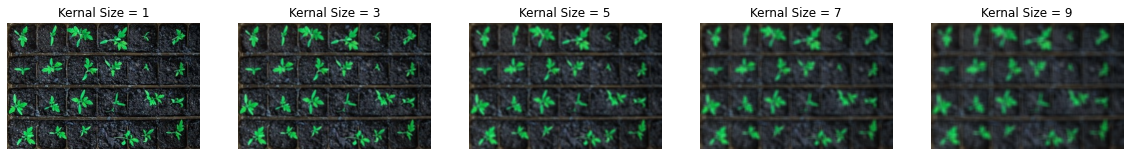

In [7]:
plt.figure(figsize=(20, 5))
for i, k in enumerate([1,3,5,7,9]):
    kernel = np.ones((k, k)) / k**2 # Average kernel
    filtering = cv2.filter2D(img_bgr, -1, kernel)
    plt.subplot(1, 5, i + 1)
    plt.imshow(filtering)
    plt.title("Kernal Size = {}".format(k))
    plt.axis("off")

plt.show()

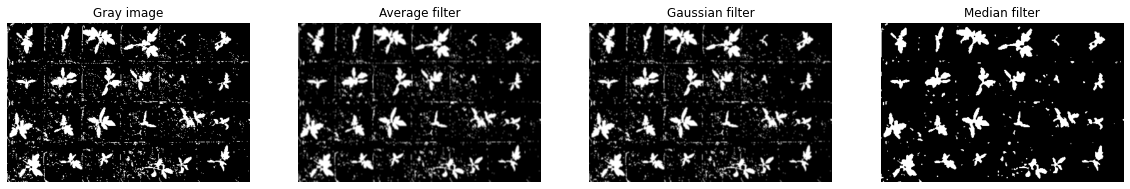

In [8]:
k_size = 3
filters = {}
filters[0] = cv2.blur(seedling_mask, (k_size,k_size)) # Averaging filter
filters[1] = cv2.GaussianBlur(seedling_mask, (k_size, k_size), 0) # Gaussian filter
filters[2] = cv2.medianBlur(seedling_mask, k_size) # Median filter

plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(seedling_mask, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title('Gray image')

titles = ["Average filter", "Gaussian filter", "Median filter"]
for i in range(3):
    plt.subplot(1, 4, i + 2)
    plt.title(titles[i])
    plt.imshow(filters[i], cmap = 'gray')
    plt.axis("off")
plt.show()

Among these filters directly applied to the original image, the median filter performed well to reduce the point noise. However, it is difficult to remove all the noises because filtering methods also affect the target objects.

### Part 2. Noise post-processing
#### Applying filter:
- Morphological operator: Erosion and Dilation
- Morphological operator: Opening and Closing

Until now, we tried to apply the pre-processing method to remove the noises. Pre-processing is close to doing a segmentation by thresholding which is using the kernel. There exists a limitation using pre-processing. One is applying a uniform threshold may not work across the image, and the other is the saturation and noise can cause problems. Morphology transform could be used to detect the target object and to overcome those limitations. In image analysis, morphology operation is used to separate a target object from the background. It is generally used for a binary or grayscale image. There are several methods of morphology operation; `Dilation`, `Erosion`, and `opening` and `closing` combining technic between dilation and erosion. 

#### Part 2-1. Morphological operators: (erosion and dilation)

Before we conduct a morphological operation, we need to set what type of structuring element we applying for. `OpenCV` provides three types of structuring elements; cross-type(`cv2.MORPH_CROSS`), rectangle type(`cv2.MORPH_RECT`), and ellipse type(`cv2.MORPH_ELLIPSE`).[4](https://vovkos.github.io/doxyrest-showcase/opencv/sphinxdoc/enum_cv_MorphShapes.html#doxid-d4-d86-group-imgproc-filter-1gac2db39b56866583a95a5680313c314ad)

`Dilation`[5](https://datascienceschool.net/03%20machine%20learning/03.02.02%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%ED%95%84%ED%84%B0%EB%A7%81.html) is a way of applying the structuring element to the image, which means if there are any 1 of the given pixel, it replaces it as 1. It is to say that the given pixel reflects its maximum value in the kernel region. This method helps to smooth the boundary.

On the other hand, `erosion` is a way of applying the structuring element to the image, which means if there are any 0 of the given pixel, it replaces it as 0. It is also to say that the given pixel reflects its minimum value in the kernel region. This method works to remove tiny objects.

In [9]:
# print(cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))) # cross kernel
# print(cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))) # elipse kernel
# print(cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))) # retengular kernel

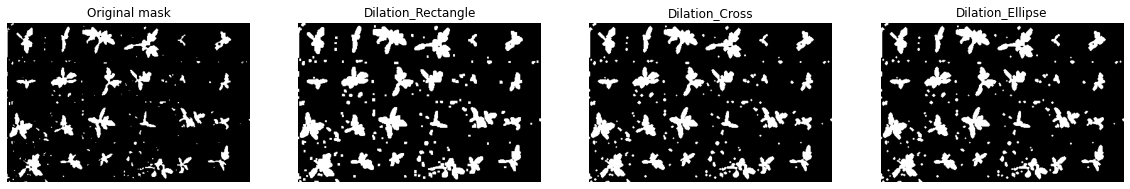

In [10]:
# mask = seedling_mask
mask = filters[2] # original image + median filter
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
kernel[1] = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel[2] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
titles = ["Dilation_Rectangle", "Dilation_Cross", "Dilation_Ellipse"]

plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
plt.title("Original mask")
plt.imshow(mask, cmap = 'gray')
plt.axis("off")

for i in range(3):
    dilation = cv2.dilate(mask, kernel[i])
    plt.subplot(1, 4, i + 2)
    plt.title(titles[i])
    plt.imshow(dilation, cmap = 'gray')
    plt.axis("off")
plt.show()

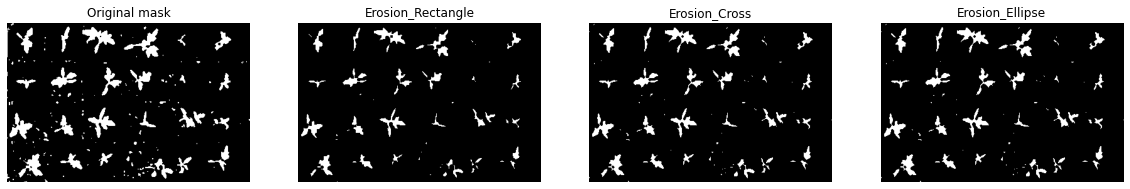

In [11]:
# mask = seedling_mask
mask = filters[2] # original image + median filter
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
kernel[1] = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel[2] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
titles = ["Erosion_Rectangle", "Erosion_Cross", "Erosion_Ellipse"]

plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
plt.title("Original mask")
plt.imshow(mask, cmap = 'gray')
plt.axis("off")

for i in range(3):
    erosion = cv2.erode(mask, kernel[i])
    plt.subplot(1, 4, i + 2)
    plt.title(titles[i])
    plt.imshow(erosion, cmap = 'gray')
    plt.axis("off")
plt.show()

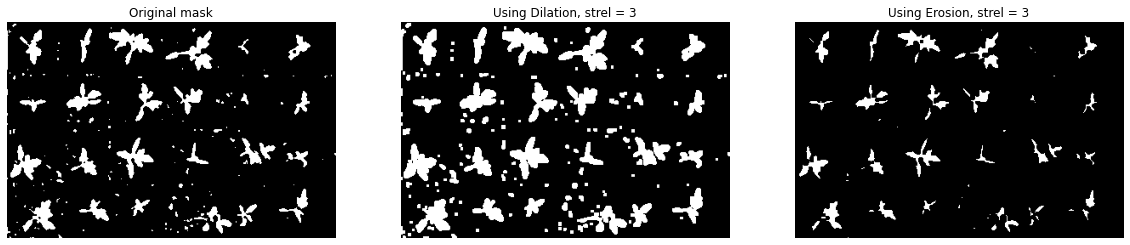

In [12]:
# mask = seedling_mask
mask = filters[2] # original image + median filter

# strel = np.ones((3,3),np.uint8)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

# Apply erosion (1x) to the thresholded image
mask_eroded = cv2.erode(mask, strel) 

# Apply dilation (1x) to the thresholded image
mask_dilated = cv2.dilate(mask, strel) 

plt.figure(figsize = (20, 5))
plt.subplot(1, 3, 1)
plt.title("Original mask")
plt.imshow(mask, cmap = 'gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Using Dilation, strel = 3")
plt.imshow(mask_dilated, cmap = 'gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Using Erosion, strel = 3")
plt.imshow(mask_eroded, cmap = 'gray')
plt.axis("off")
plt.show()

#### Part 2-2. Morphological operators: (Opening and Closing)

When we compare the image above, we can see the differences between `dilation` and `erosion`.

Another way of morphological operators is `opening` and `closing`, which are a combination of dilation and erosion. `Opening` is a way of applying the erosion method first and dilation afterward, and it is a proper method to remove the point noise, tiny objects. In addition, it is also a useful method to detect a single object. `Closing` is the opposite way of opening. It is a way of applying dilation first and erosion afterward. So, it enables combine objects which are close to each other.

When the size of the structuring element increase, the target objects get smaller in the opening method, and the target objects get larger in the closing method. Hence, these morphological operators are useful ways of removing noise, smoothing the borders of objects.

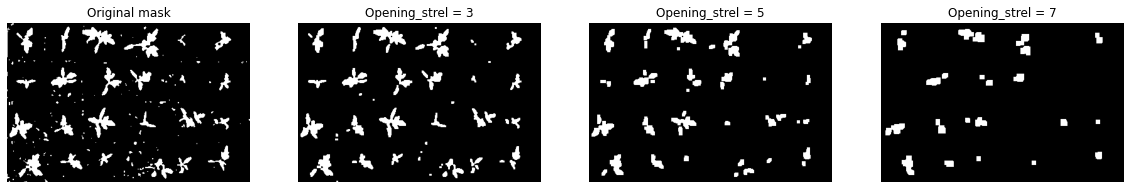

In [13]:
# mask = seedling_mask
mask = filters[2] # original image + median filter

kernel[0] = np.ones((3, 3), np.uint8)
kernel[1] = np.ones((5, 5), np.uint8)
kernel[2] = np.ones((7, 7), np.uint8)
titles = ["Opening_strel = 3", "Opening_strel = 5", "Opening_strel = 7" ]

plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
plt.title("Original mask")
plt.imshow(mask, cmap = 'gray')
plt.axis("off")

for i in range(3):
    Opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel[i]) 
    plt.subplot(1, 4, i + 2)
    plt.title(titles[i])
    plt.imshow(Opening, cmap = 'gray')
    plt.axis("off")
plt.show()

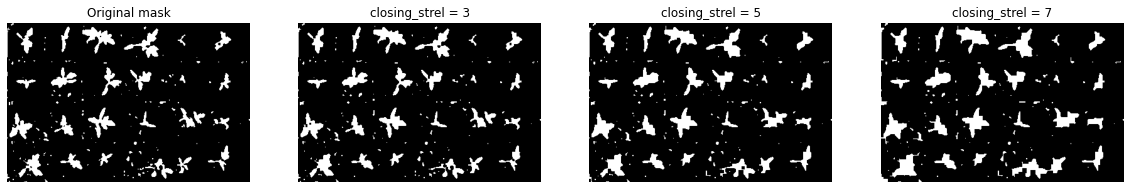

In [14]:
# mask = seedling_mask
mask = filters[2] # original image + median filter

kernel[0] = np.ones((3, 3), np.uint8)
kernel[1] = np.ones((5, 5), np.uint8)
kernel[2] = np.ones((7, 7), np.uint8)
titles = ["closing_strel = 3", "closing_strel = 5", "closing_strel = 7" ]

plt.figure(figsize = (20, 5))
plt.subplot(1, 4, 1)
plt.title("Original mask")
plt.imshow(mask, cmap = 'gray')
plt.axis("off")

for i in range(3):
    Opening = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel[i]) 
    plt.subplot(1, 4, i + 2)
    plt.title(titles[i])
    plt.imshow(Opening, cmap = 'gray')
    plt.axis("off")
plt.show()

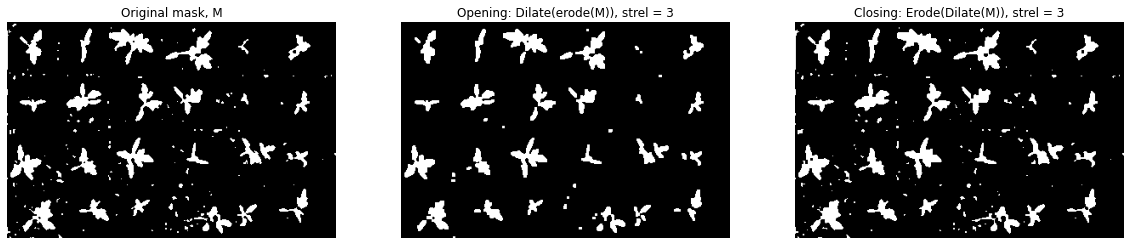

In [15]:
# mask = seedling_mask
mask = filters[2] # original image + median filter

strel = np.ones((3,3),np.uint8) # structuring elements
# strel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) # same way

# Apply option 1: M' = dilate(erode(M)) - also called "opening"
# mask_opened = cv2.dilate( cv2.erode(mask, strel), strel)
mask_opened = cv2.morphologyEx(mask, cv2.MORPH_OPEN, strel)
# mask_opened1 = cv2.morphologyEx(mask_opened, cv2.MORPH_OPEN, strel)
# Apply option 2: M1 = erode(dilate(M)) -  also called "closing"
# mask_closed = cv2.erode( cv2.dilate(mask, strel), strel)
mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, strel)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(mask, cmap='gray')
plt.title('Original mask, M')
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask_opened, cmap='gray')
plt.title('Opening: Dilate(erode(M)), strel = 3')
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(mask_closed, cmap='gray')
plt.title('Closing: Erode(Dilate(M)), strel = 3')
plt.axis("off")
plt.show()

### Part 3. Segmentation using contour

Throughout the pre-processing and post-processing of the image analysis, we can understand how to deal with the noise. Sometimes, however, it is necessary to detect objects or draw outlines for further analysis. We can execute this using the Machine learning method. Before applying it, we need to let the machine what is the objects we want to find. This step is generally called masking or labeling over the image. In other words, it is the same way to tell whether the objects are right or wrong based on the masking. We can expect more accurate outputs if we create a clean mask of images.

In the `OpenCV` library, it provides some functions to measure the object. Among them, `contour` uses to calculate boundary line information about equal colors and pixel values(intensity). It also uses to detect objects or outline objects. However, it is only available to use in grayscale images or binary images. In OpenCV, provide the functions to find and draw contours; `findContours()` and `drawContours()`.

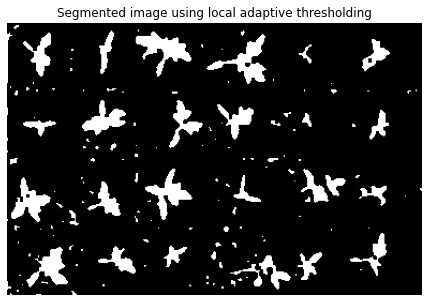

In [16]:
# Apply pre-processing using bilater filtering
img_median =  cv2.medianBlur(seedling_mask, 3) 
img_close =  cv2.morphologyEx(img_median, cv2.MORPH_CLOSE, strel)
# Perform local adaptive thresholding to keep the brighter parts of the image as foreground and the darker parts as background
local_average = cv2.blur(img_close, (15,15))
plant_mask = 255*(img_close > local_average + 1).astype('uint8')

plt.figure(figsize=(20,5))
plt.imshow(plant_mask, cmap='gray')
plt.title('Segmented image using local adaptive thresholding')
plt.axis("off")
plt.show()

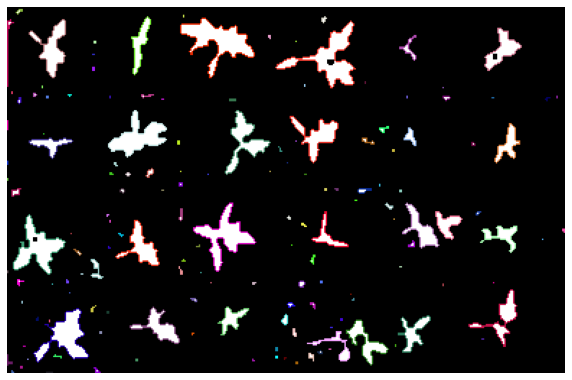

In [17]:
# A function to draw the contours over an image and show the results
def showContoursOnImg(img, contours):
    # Now display the filtered plant contours
    img_show = []
    if(len(img.shape)==2):
        img_show = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    else:
        img_show = img.copy()
    for cnt in contours:
        r = int(np.random.random() * 256)
        g = int(np.random.random() * 256)
        b = int(np.random.random() * 256)
        cv2.drawContours(img_show, [cnt], -1, (b, g, r), 1)
    plt.figure(figsize=(10,10))
    imshow_rgb(img_show)
    plt.axis("off")
    plt.show()
        
        
# Find all connected components and retrieve the external contour of each coco.
contours, hierarchy = cv2.findContours(plant_mask, cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_NONE)

# Show contours
showContoursOnImg(plant_mask, contours)

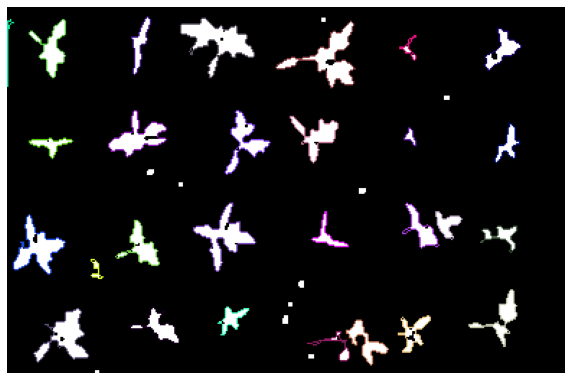

In [18]:
# Set a threshold for the contour length
contour_threshold = 25
# Create a new empty contour list to which we will add the plant contours
plant_contours = []
# Make a new list with all contours that have a length larger than contour_threshold 
plant_contours = [cnt for cnt in contours if len(cnt)>contour_threshold ]

showContoursOnImg(mask_opened, plant_contours)

Besides, it is also possible to get a cleaned mask if we set the threshold. When we compare the above two images, it is enabled to remove the noises throughout the contour threshold.

Finally, below are codes for returning the height and area of objects and their labeled value. It seems that there is no perfect way for removing the noises, however, we keep trying to find a better solution using highly advanced technology.

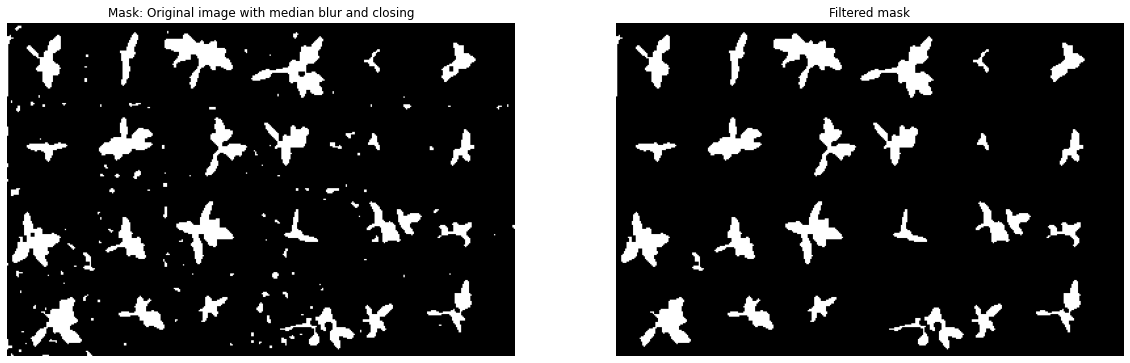

In [19]:
# Create a clean plant mask from the filtered contours
plant_mask_clean = np.zeros(plant_mask.shape, dtype='uint8')
for cnt in plant_contours:
    cv2.drawContours(plant_mask_clean, [cnt], -1, (255), -1)

# Show the original and new plant mask
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
plt.imshow(plant_mask, cmap='gray')
plt.axis("off")
plt.title('Mask: Original image with median blur and closing')

plt.subplot(1,2,2)
plt.imshow(plant_mask_clean, cmap='gray')
plt.axis("off")
plt.title('Filtered mask')
plt.show()

In [20]:
# Sort the contours from left to right
contours_pos = [(cnt, cv2.boundingRect(cnt)) for cnt in plant_contours]
contours_pos = sorted(contours_pos, key=lambda x: x[1])

# Calculate some statistics for the plants
plant_data = []
for cnt,pos in contours_pos:
    # Get the bounding
    x,y,w,h = cv2.boundingRect(cnt)
    # Get total area
    area = cv2.contourArea(cnt)
#     if area < 10:
#         continue
    plant_data.append( {'height': h, 'area': area} )

import pandas as pd
measured_data = pd.DataFrame(plant_data)
# measured_data.index = measured_data.index + 1
measured_data

,height,area
0,47,9.5
1,42,566.0
2,41,363.5
3,15,147.0
4,38,546.5
5,14,32.5
6,33,503.0
7,32,312.5
8,26,276.5
9,41,195.0


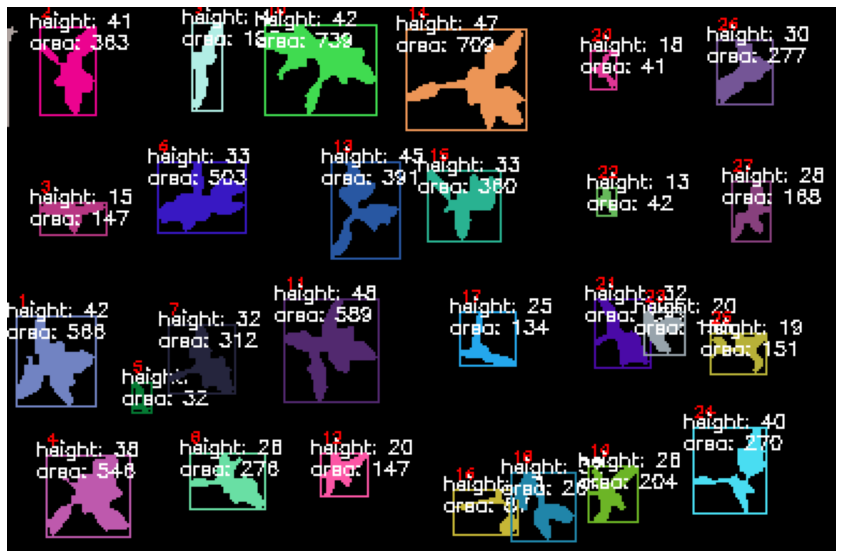

In [21]:
# Now display the filtered plant contours and the data
img_show = cv2.cvtColor(plant_mask_clean, cv2.COLOR_GRAY2BGR)
# img_show = cv2.cvtColor(mask_opened, cv2.COLOR_GRAY2BGR)
count = 0
for cnt_pos, data in zip(contours_pos, plant_data):
    cnt = cnt_pos[0]
    
    # Choose a random color
    r = int(np.random.random() * 256)
    g = int(np.random.random() * 256)
    b = int(np.random.random() * 256)
    
    # Draw the contour of the plant
    cv2.drawContours(img_show, [cnt], -1, (b, g, r), -1)

    # Draw the bounding rectangle
    x,y,w,h = cv2.boundingRect(cnt)
    if cv2.contourArea(cnt) < 10: # not include when the area less than 10
        continue
    cv2.rectangle(img_show,(x,y),(x+w,y+h),(b, g, r),1)
    
    count += 1
    string = str(count)
    cv2.putText(img_show, string, (x, y-5), cv2.FONT_HERSHEY_PLAIN, 0.5, (0, 0, 255))
    
    cv2.putText(img_show, 'height: %d' %(data['height']), (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,255,255))
    cv2.putText(img_show, 'area: %d' % (data['area']),(x-5, y +10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,255,255))

    
    
plt.figure(figsize=(20,10))
plt.axis("off")
imshow_rgb(img_show)
plt.show()

#### Reference
[1] https://en.wikipedia.org/wiki/Image_noise

[2] Lecture Note:Image filtering and segmentation.pdf https://nmbu.instructure.com/courses/7475/files/1362683?module_item_id=147355

[3] https://github.com/ashushekar/image-convolution-from-scratch

[4] 
https://vovkos.github.io/doxyrest-showcase/opencv/sphinxdoc/enum_cv_MorphShapes.html#doxid-d4-d86-group-imgproc-filter-1gac2db39b56866583a95a5680313c314ad

[5] Korean website for image analysis 
https://datascienceschool.net/03%20machine%20learning/03.02.02%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%ED%95%84%ED%84%B0%EB%A7%81.html

[6] Korean website for image analysis
https://dsbook.tistory.com/203?category=802614

[7] Korean website for image contour https://dsbook.tistory.com/220

[8] https://github.com/chloe73/openCV/wiki/OpenCV_Segmentation,Labeling